In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pims
#import pillow
#Open Terminal
#conda install -c conda-forge pims
#conda install -c conda-forge numpy
#conda install -c conda-forge pillow

In [114]:
v = pims.TiffStack('daisy.tiff')
print('frames: ',len(v))
#the number of frames depends on what exactly the image is formed of. If the exported image is a
#fastFLIM images the tiff file will contain 2 frames:
#intensity
#average lifetime (unfitted, this is the average photon arrival time)
#Frame objects returned by PIMS are a subclass of numpy.ndarray, adding two new attributes:
#frame_no, an integer
#metadata, a dictionary
intensity=v[0]
lifetime=v[1]


len(v[1]) 
im_size=lifetime.shape # tuple
#len(lifetime)
im_intensity=np.zeros(im_size)
im_lifetime=np.zeros(im_size)
lifetime2=1E+9*lifetime # lifetime values given in ns
for i in range(1,im_size[0]):
   im_intensity[i,:] = intensity[i,:]
for j in range(1,im_size[0]):  
    im_lifetime[j,:] = lifetime2[j,:]
     
#im_size[0]
#im_size[1]
#im_intensity


frames:  2


/opt/conda/lib/python3.6/site-packages/tifffile/tifffile.py:2159: UserWarning: tags are not ordered by code
  warnings.warn("tags are not ordered by code")


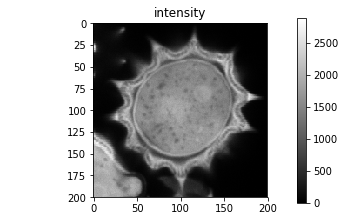

In [115]:
fig = plt.figure(figsize=(6, 3.2))
ax = fig.add_subplot(111)
ax.set_title('intensity')

plt.imshow(im_intensity,cmap="gray" )
ax.set_aspect('equal')
cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()


#######
#apply a simple threashold. Show all pixels with intensity value higher than threashold
#######
threshold=1000 #threshold given in counts
#thres_image=im_intensity
thres_image_ROI_mask=np.ones(im_size)
for i in range(im_size[0]):
    for j in range(im_size[1]):
      if im_intensity[i,j] < threshold :
        #thres_image[i,j]=0
        thres_image_ROI_mask[i,j]=0
        
#thres_image_ROI_mask[thres_image_ROI_mask > 0]=1




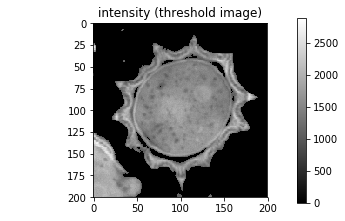

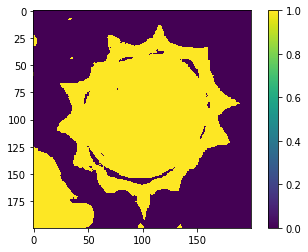

In [116]:
fig = plt.figure(figsize=(6, 3.2))
ax = fig.add_subplot(111)
ax.set_title('intensity (threshold image)')

plt.imshow((im_intensity*thres_image_ROI_mask),cmap="gray")
ax.set_aspect('equal')
cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

ax = fig.add_subplot(211)
ax.set_title('intensity (threshold image)')

plt.imshow(thres_image_ROI_mask)
ax.set_aspect('equal')
cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

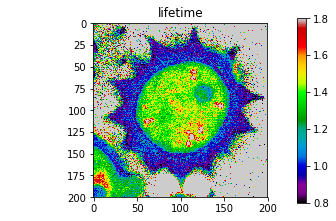

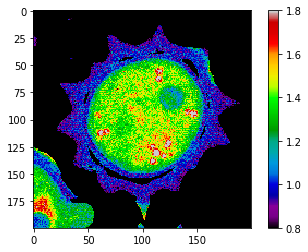

In [117]:
fig = plt.figure(figsize=(6,3.2))
ax = fig.add_subplot(111)
ax.set_title('lifetime')
plt.imshow(lifetime2,vmin=.8,vmax=1.8,cmap="nipy_spectral") # This also sets the scale for the colormap to 1.8ns - 3ns
ax.set_aspect('equal')
cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()
#Colormap Possible values are:
#Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r,
#Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r,
#PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn,
#PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, 
#RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, 
#Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, 
#Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, 
#YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, 
#cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, 
#gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r,
#gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2,
#gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, 
#magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, 
#prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r,
#tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r,
#winter, winter_r
ax = fig.add_subplot(111)
ax.set_title('lifetime')
plt.imshow(lifetime2*thres_image_ROI_mask,vmin=.8,vmax=1.8, cmap="nipy_spectral") # This also sets the scale for the colormap to 1.8ns - 3ns
ax.set_aspect('equal')
cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()


In [118]:
#######
#apply a simple threashold
#######
threshold=100 #threshold given in counts
thres_image=im_intensity
thres_image[thres_image < threshold] = 0
thres_image_ROI_mask=thres_image
thres_image_ROI_mask[thres_image_ROI_mask > 0]=1
#thres_image1 = np.multiply(thres_image_ROI_mask , im_intensity)
#fig = plt.figure(figsize=(6, 3.2))
#ax = fig.add_subplot(111)
#ax.set_title('intensity')

#plt.imshow(thres_image)
#ax.set_aspect('equal')
#cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
#cax.get_xaxis().set_visible(False)
#cax.get_yaxis().set_visible(False)
#cax.patch.set_alpha(0)
#cax.set_frame_on(False)
#plt.colorbar(orientation='vertical')
#plt.show()


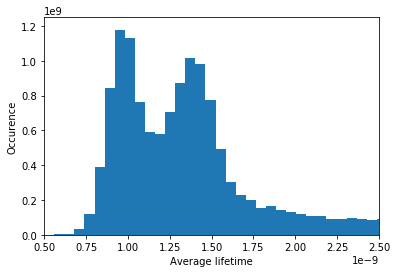

In [119]:
%matplotlib inline
plt.hist(list(lifetime.flat), normed=True, bins=700)
plt.ylabel('Occurence');
plt.xlabel('Average lifetime');
plt.axis((0.5E-9,2.5E-9,0,1.25E9));

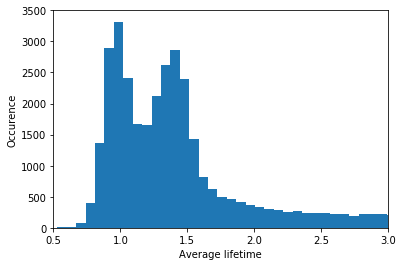

In [120]:
%matplotlib inline
plt.hist(list(im_lifetime.flat),  bins=600)
plt.ylabel('Occurence');
plt.xlabel('Average lifetime');
#plt.axis((0.5E-9,2.5E-9,0,1.25E9));
plt.axis((0.5,3,0,3500));

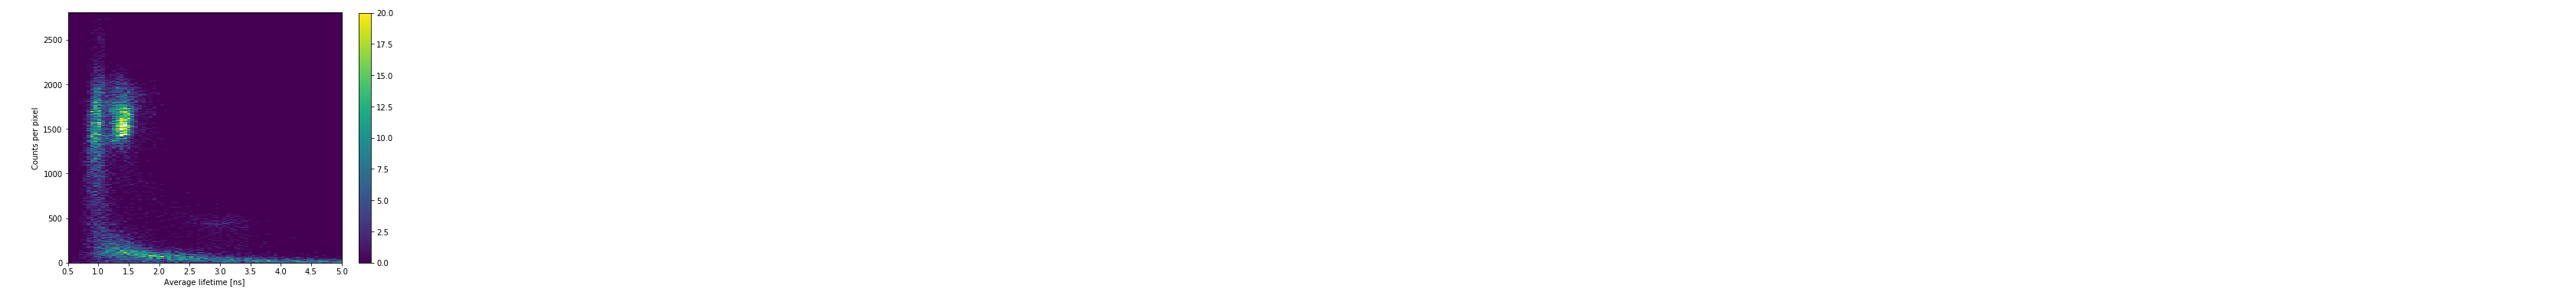

In [144]:
%matplotlib inline
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.hist2d(list(im_lifetime.flat), list(intensity.flat), bins=700, cmin=0 ,cmax=20)
#plt.hist2d(im_lifetime,im_intensity, norm=LogNorm(), bins=40)
plt.ylabel('Counts per pixel');
plt.xlabel('Average lifetime [ns]');
#plt.axis((0.5E-9,2.5E-9,0,1.25E9));
plt.axis((0.5,5,0,2800));
plt.colorbar()
plt.show()

In [109]:
v = pims.TiffStack('daisy3LTfit.tiff')

print('frames: ',len(v))

# the number of frames depends on what exactly the image is formed of. If the exported image is a
# fastFLIM images the tiff file will contain 2 frames:
# intensity
# average lifetime (unfitted, this is the average photon arrival time)
# if like in the below case the tiff contains a fitted FLIM image then the selected channels
# (in this example Amplitude 1..3) will be exported as separate frames

LT1=v[0]
LT2=v[1]
LT3=v[2]

frames:  3


/opt/conda/lib/python3.6/site-packages/tifffile/tifffile.py:2159: UserWarning: tags are not ordered by code
  warnings.warn("tags are not ordered by code")


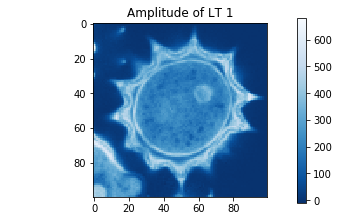

In [112]:
fig = plt.figure(figsize=(6, 3.2))
ax = fig.add_subplot(111)
ax.set_title('Amplitude of LT 1')
plt.imshow(LT1,cmap="Blues_r")
ax.set_aspect('equal')
cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

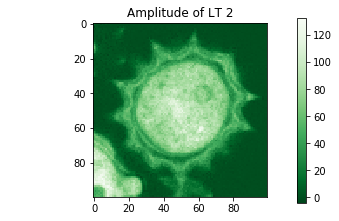

In [113]:
fig = plt.figure(figsize=(6, 3.2))
ax = fig.add_subplot(111)
ax.set_title('Amplitude of LT 2')
plt.imshow(LT2,cmap="Greens_r")
ax.set_aspect('equal')
cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

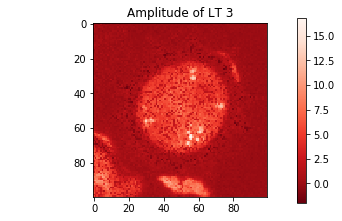

In [115]:
fig = plt.figure(figsize=(6, 3.2))
ax = fig.add_subplot(111)
ax.set_title('Amplitude of LT 3')
plt.imshow(LT3, cmap="Reds_r")
ax.set_aspect('equal')
cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()